## Points of Dispense Analysis

##### Maxwell Kennady, Nora Murray, Elizabeth Speigle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
distances = pd.read_csv('data/OD_Pairs_Distances.csv')
population = pd.read_excel('data/BG_master.xlsx')

In [3]:
dist_miles = distances.pivot(index='block_group', columns='pod_id', values='Miles')

In [4]:
dist = dist_miles.values
N = population['population'].values
a_prop = population['anthrax'].values
f_prop = population['flood'].values

In [5]:
infile = open('pods_open_total','rb')
pods_total = pickle.load(infile)
infile.close()

In [41]:
infile = open('pods_open_total2','rb')
pods_total2 = pickle.load(infile)
infile.close()

In [6]:
infile = open('pods_open_minmax','rb')
pods_minmax = pickle.load(infile)
infile.close()

In [42]:
infile = open('pods_open_minmax2','rb')
pods_minmax2 = pickle.load(infile)
infile.close()

In [7]:
infile = open('pods_flood_total','rb')
pods_flood_total = pickle.load(infile)
infile.close()

In [8]:
infile = open('pods_flood_total2','rb')
pods_flood_total2 = pickle.load(infile)
infile.close()

In [9]:
infile = open('pods_flood_minmax','rb')
pods_flood_minmax = pickle.load(infile)
infile.close()

In [10]:
infile = open('pods_flood_minmax2','rb')
pods_flood_minmax2 = pickle.load(infile)
infile.close()

In [11]:
infile = open('pods_anthrax_total','rb')
pods_anthrax_total = pickle.load(infile)
infile.close()

In [12]:
infile = open('pods_anthrax_minmax','rb')
pods_anthrax_minmax = pickle.load(infile)
infile.close()

In [35]:
infile = open('pods_anthrax_minmax2','rb')
pods_anthrax_minmax2 = pickle.load(infile)
infile.close()

### Comparing average and maximum distance by PODs opened

In [43]:
dist_compare = {'num_pods':[],
                'max_dist_total':[],
                'max_dist_minmax':[],
                'avg_dist_total':[],
                'avg_dist_minmax':[]}

for k in pods_minmax2.keys():
    dist_compare['num_pods'].append(k)
    
    # Minimize total distance
    avg_total = sum([dist[j,i] * N[j] for [j,i] in pods_total2[k]])/sum([N[j] for [j,i] in pods_total2[k]]) 
    max_total = max([dist[j,i] for [j,i] in pods_total2[k] if N[j]>0])
    
    # Minimize maximum distance
    avg_minmax = sum([dist[j,i] * N[j] for [j,i] in pods_minmax2[k]])/sum([N[j] for [j,i] in pods_minmax2[k]]) 
    max_minmax = max([dist[j,i] for [j,i] in pods_minmax2[k] if N[j]>0])
    
    dist_compare['max_dist_total'].append(max_total)
    dist_compare['max_dist_minmax'].append(max_minmax)
    dist_compare['avg_dist_total'].append(avg_total)
    dist_compare['avg_dist_minmax'].append(avg_minmax)

In [48]:
dist_df = pd.DataFrame(dist_compare)

In [50]:
cols = ['max_dist_total','max_dist_minmax','avg_dist_total','avg_dist_minmax']

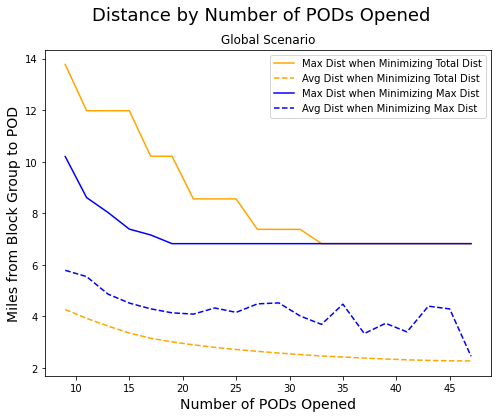

In [112]:
plt.figure(figsize=(8,6))

plt.plot(dist_df['num_pods'], dist_df['max_dist_total'], ls='-', color='orange',
         label='Max Dist when Minimizing Total Dist')
plt.plot(dist_df['num_pods'], dist_df['avg_dist_total'], ls='--', color='orange',
         label='Avg Dist when Minimizing Total Dist')
plt.plot(dist_df['num_pods'], dist_df['max_dist_minmax'], 
         'b-', label='Max Dist when Minimizing Max Dist')
plt.plot(dist_df['num_pods'], dist_df['avg_dist_minmax'], 
         'b--', label='Avg Dist when Minimizing Max Dist')
plt.suptitle('Distance by Number of PODs Opened', size=18)
plt.title('Global Scenario')
plt.ylabel('Miles from Block Group to POD', size=14)
plt.xlabel('Number of PODs Opened', size=14)
plt.legend()
plt.show()

Flood Scenario

In [22]:
dist_flood_compare = {'num_pods':[],
                      'max_dist_total':[],
                      'max_dist_minmax':[],
                      'avg_dist_total':[],
                      'avg_dist_minmax':[]}

for k in pods_flood_minmax2.keys():
    dist_flood_compare['num_pods'].append(k)
    
    # Minimize total distance
    avg_total = sum([dist[j,i] * N[j] * f_prop[j] for [j,i] in pods_flood_total2[k]])/sum([N[j] * f_prop[j] for [j,i] in pods_flood_total2[k]]) 
    max_total = max([dist[j,i] for [j,i] in pods_flood_total2[k] if (N[j] * f_prop[j])>0])
    
    # Minimize maximum distance
    avg_minmax = sum([dist[j,i] * N[j] * f_prop[j] for [j,i] in pods_flood_minmax2[k]])/sum([N[j] * f_prop[j] for [j,i] in pods_flood_minmax2[k]]) 
    max_minmax = max([dist[j,i] for [j,i] in pods_flood_minmax2[k] if (N[j] * f_prop[j])>0])    
    
    dist_flood_compare['max_dist_total'].append(max_total)
    dist_flood_compare['max_dist_minmax'].append(max_minmax)
    dist_flood_compare['avg_dist_total'].append(avg_total)
    dist_flood_compare['avg_dist_minmax'].append(avg_minmax)

In [23]:
dist_flood_df = pd.DataFrame(dist_flood_compare)

In [32]:
cols = ['max_dist_total','max_dist_minmax','avg_dist_total','avg_dist_minmax']

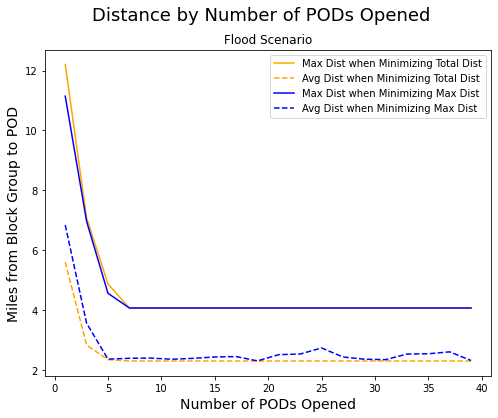

In [87]:
plt.figure(figsize=(8,6))

plt.plot(dist_flood_df['num_pods'], dist_flood_df['max_dist_total'], ls='-', color='orange',
         label='Max Dist when Minimizing Total Dist')
plt.plot(dist_flood_df['num_pods'], dist_flood_df['avg_dist_total'], ls='--', color='orange',
         label='Avg Dist when Minimizing Total Dist')
plt.plot(dist_flood_df['num_pods'], dist_flood_df['max_dist_minmax'], 
         'b-', label='Max Dist when Minimizing Max Dist')
plt.plot(dist_flood_df['num_pods'], dist_flood_df['avg_dist_minmax'], 
         'b--', label='Avg Dist when Minimizing Max Dist')
plt.suptitle('Distance by Number of PODs Opened', size=18)
plt.title('Flood Scenario')
plt.ylabel('Miles from Block Group to POD', size=14)
plt.xlabel('Number of PODs Opened', size=14)
plt.legend()
plt.show()

Anthrax

In [36]:
dist_anthrax_compare = {'num_pods':[],
                      'max_dist_total':[],
                      'max_dist_minmax':[],
                      'avg_dist_total':[],
                      'avg_dist_minmax':[]}

for k in pods_anthrax_minmax2.keys():
    dist_anthrax_compare['num_pods'].append(k)
    
    # Minimize total distance
    avg_total = sum([dist[j,i] * N[j] * a_prop[j] for [j,i] in pods_anthrax_total[k]])/sum([N[j] * a_prop[j] for [j,i] in pods_anthrax_total[k]]) 
    max_total = max([dist[j,i] for [j,i] in pods_anthrax_total[k] if N[j] * a_prop[j]>0])    
    
    # Minimize maximum distance
    avg_minmax = sum([dist[j,i] * N[j] * a_prop[j] for [j,i] in pods_anthrax_minmax2[k]])/sum([N[j] * a_prop[j] for [j,i] in pods_anthrax_minmax2[k]]) 
    max_minmax = max([dist[j,i] for [j,i] in pods_anthrax_minmax2[k] if N[j] * a_prop[j]>0])    
    
    dist_anthrax_compare['max_dist_total'].append(max_total)
    dist_anthrax_compare['max_dist_minmax'].append(max_minmax)
    dist_anthrax_compare['avg_dist_total'].append(avg_total)
    dist_anthrax_compare['avg_dist_minmax'].append(avg_minmax)

In [37]:
dist_anthrax_df = pd.DataFrame(dist_anthrax_compare)

In [39]:
cols = ['max_dist_total','max_dist_minmax','avg_dist_total','avg_dist_minmax']

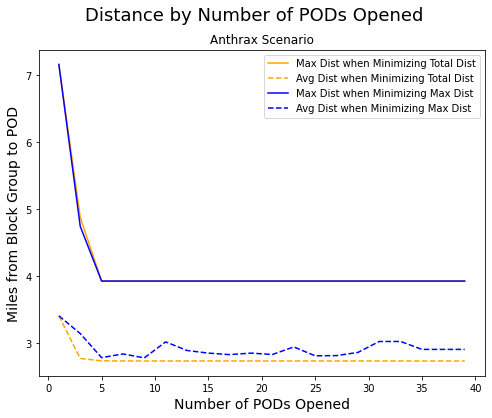

In [88]:
plt.figure(figsize=(8,6))

plt.plot(dist_anthrax_df['num_pods'], dist_anthrax_df['max_dist_total'], ls='-', color='orange',
         label='Max Dist when Minimizing Total Dist')
plt.plot(dist_anthrax_df['num_pods'], dist_anthrax_df['avg_dist_total'], ls='--', color='orange',
         label='Avg Dist when Minimizing Total Dist')
plt.plot(dist_anthrax_df['num_pods'], dist_anthrax_df['max_dist_minmax'], 
         'b-', label='Max Dist when Minimizing Max Dist')
plt.plot(dist_anthrax_df['num_pods'], dist_anthrax_df['avg_dist_minmax'], 
         'b--', label='Avg Dist when Minimizing Max Dist')
plt.suptitle('Distance by Number of PODs Opened', size=18)
plt.title('Anthrax Scenario')
plt.ylabel('Miles from Block Group to POD', size=14)
plt.xlabel('Number of PODs Opened', size=14)
plt.legend()
plt.show()

### Histograms

Opening 20 PODs:

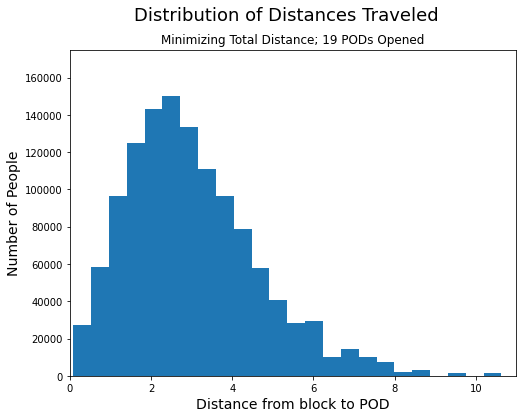

In [110]:
plt.figure(figsize=(8,6))
plt.hist([dist[j,i] for [j,i] in pods_total2[19]], weights=[N[j] for [j,i] in pods_total2[19]], bins=30)
plt.suptitle('Distribution of Distances Traveled', size=18)
plt.title('Minimizing Total Distance; 19 PODs Opened')
plt.xlabel('Distance from block to POD', size=14)
plt.ylabel('Number of People', size=14)
plt.xlim(0, 11)
plt.ylim(0, 175000)
plt.show()

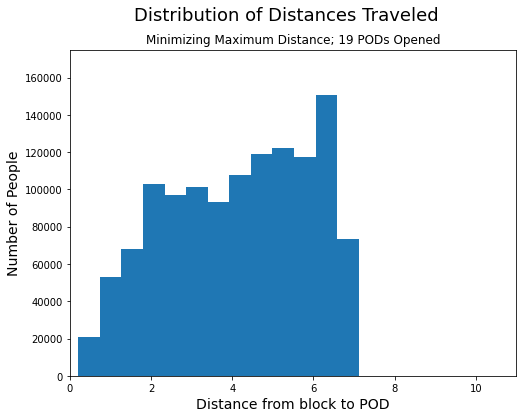

In [111]:
plt.figure(figsize=(8,6))
plt.hist([dist[j,i] for [j,i] in pods_minmax2[19]], weights=[N[j] for [j,i] in pods_minmax2[19]], bins=45)
plt.suptitle('Distribution of Distances Traveled', size=18)
plt.title('Minimizing Maximum Distance; 19 PODs Opened')
plt.xlabel('Distance from block to POD', size=14)
plt.ylabel('Number of People', size=14)
plt.xlim(0, 11)
plt.ylim(0, 175000)
plt.show()

Flooding scenario

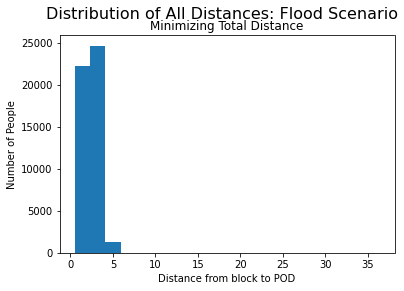

In [65]:
plt.figure(figsize=(8,6))
plt.hist([dist[j,i] for [j,i] in pods_flood_total2[5]], 
         weights=[N[j] * f_prop[j] for [j,i] in pods_flood_total2[5]], bins=20)
plt.suptitle('Distribution of All Distances: Flood Scenario', size=16)
plt.title('Minimizing Total Distance')
plt.xlabel('Distance from block to POD')
plt.ylabel('Number of People')
# plt.xlim(0, 9)
# plt.ylim(0, 160000)
plt.show()

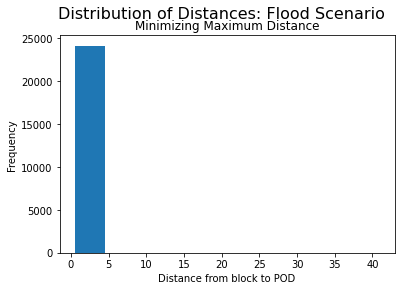

In [66]:
plt.hist([dist[j,i] for [j,i] in pods_flood_minmax2[5]], 
         weights=[N[j] * f_prop[j] for [j,i] in pods_flood_minmax2[5]], bins=20)
plt.suptitle('Distribution of Distances: Flood Scenario', size=16)
plt.title('Minimizing Maximum Distance')
plt.xlabel('Distance from block to POD')
plt.ylabel('Frequency')
# plt.xlim(0, 9)
# plt.ylim(0, 160000)
plt.show()

Anthrax Scenario

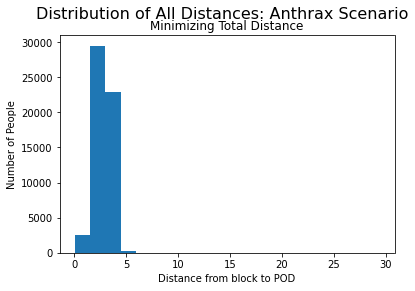

In [69]:
plt.hist([dist[j,i] for [j,i] in pods_anthrax_total[3]], 
         weights=[N[j] * a_prop[j] for [j,i] in pods_anthrax_total[3]], bins=20)
plt.suptitle('Distribution of All Distances: Anthrax Scenario', size=16)
plt.title('Minimizing Total Distance')
plt.xlabel('Distance from block to POD')
plt.ylabel('Number of People')
# plt.xlim(0, 9)
# plt.ylim(0, 160000)
plt.show()

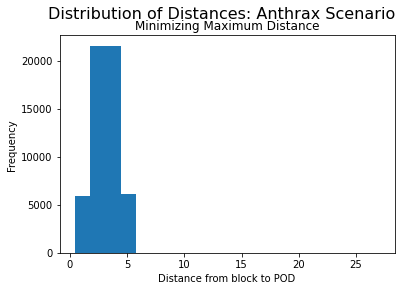

In [70]:

plt.hist([dist[j,i] for [j,i] in pods_anthrax_minmax2[3]], 
         weights=[N[j] * a_prop[j] for [j,i] in pods_anthrax_minmax2[3]], bins=20)
plt.suptitle('Distribution of Distances: Anthrax Scenario', size=16)
plt.title('Minimizing Maximum Distance')
plt.xlabel('Distance from block to POD')
plt.ylabel('Frequency')
# plt.xlim(0, 9)
# plt.ylim(0, 160000)
plt.show()

### Top PODs

Histogram of the number of times each POD is selected in the solutions

Minimize total distance

In [76]:
pods_count_total = dict.fromkeys(range(48), 0)

In [77]:
for key, value in pods_total2.items():
    pod_add = set()
    for bg, pod in value:
        pod_add.add(pod)
    for p in pod_add:
        pods_count_total[p] += 1

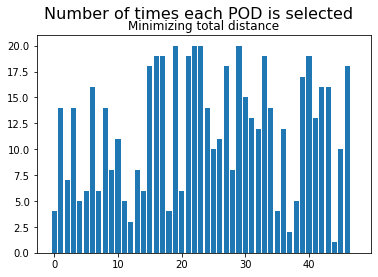

In [78]:
pod_list = []
value_list = []
for k, v in pods_count_total.items():
    pod_list.append(k)
    value_list.append(v)

plt.bar(pod_list, value_list)
plt.suptitle('Number of times each POD is selected', size=16)
plt.title('Minimizing total distance')
plt.show()

Minimize maximum distance

In [79]:
pods_count_minmax = dict.fromkeys(range(48), 0)

In [80]:
for key, value in pods_minmax2.items():
    pod_add = set()
    for bg, pod in value:
        pod_add.add(pod)
    for p in pod_add:
        pods_count_minmax[p] += 1

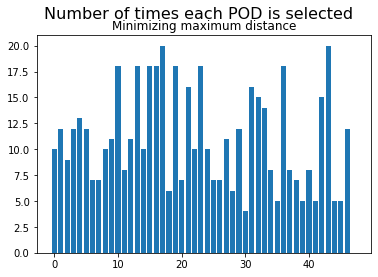

In [81]:
pod_list = []
value_list = []
for k, v in pods_count_minmax.items():
    pod_list.append(k)
    value_list.append(v)

plt.bar(pod_list, value_list)
plt.suptitle('Number of times each POD is selected', size=16)
plt.title('Minimizing maximum distance')
plt.show()

### Capacity

In [ ]:
# capacity_pod_all = [[N[j], i] for [j,i] in block_pod_list]

In [ ]:
# capacity_pod = {}
# for [N, i] in capacity_pod_all:
#     if i not in capacity_pod:
#         capacity_pod[i] = N
#     else:
#         capacity_pod[i] += N

In [ ]:
# max(capacity_pod.values())

In [ ]:
# min(capacity_pod.values())